In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [2]:
states = np.load('data_msd/states1-3-0.1.npy')
forces = np.load('data_msd/forces1-3-0.1.npy')

- states[t = 0] - states[t = T+1]
- forces[t = 0] - forces[t = T]

lets test if the previous method would work

In [3]:
states_std = np.std(states,axis=0)
forces_std = np.std(forces,axis=0)

states_mean = np.array([0,0])
forces_mean = np.array([0])

In [4]:
states_norm = (states-states_mean)/states_std
forces_norm = (forces-forces_mean)/forces_std

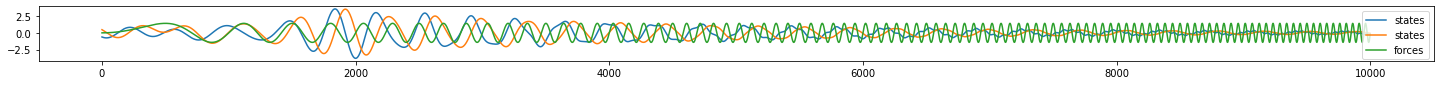

In [5]:
plt.figure(figsize=(25,1))
plt.plot(range(states_norm.shape[0]-1),states_norm[:-1],label = 'states')
plt.plot(range(forces_norm.shape[0]),forces_norm, label = 'forces')
plt.legend()
plt.show()

In [6]:
X = np.append(states_norm[:-1],forces_norm[:,np.newaxis],axis=1)

y = states_norm[1:]

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.INPUT = 3
        self.OUTPUT = 2
        self.fc_1 = nn.Linear(self.INPUT,self.OUTPUT)
    
    def forward(self,x):
        x = self.fc_1(x)
        return x

In [8]:
X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y)

dataset = TensorDataset(X_tensor,y_tensor)

dataloader = DataLoader(dataset,batch_size = 100)

In [9]:
net = Net()
loss_function = nn.MSELoss()
optimizer = optim.Adam(net.parameters(),lr = 0.001)

In [28]:
EPOCH = 10

net.train()
for epoch in range(EPOCH):
    for batch in dataloader:
        X_batch, y_batch = batch
        
        optimizer.zero_grad()
        output = net(X_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()

In [29]:
net.eval()
with torch.no_grad():
    output = net(X_tensor)
    

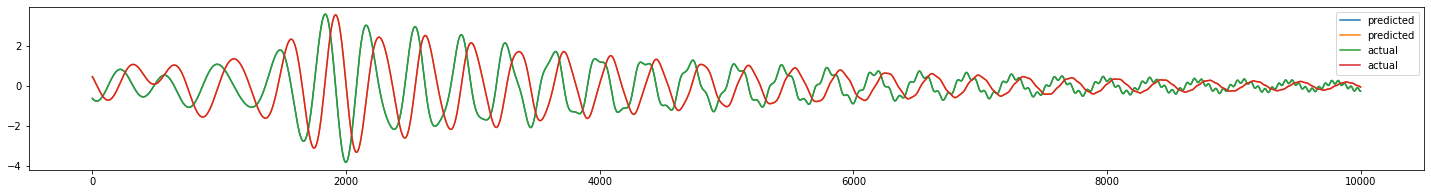

In [30]:
plt.figure(figsize=(25,3))
plt.plot(range(output.shape[0]),output,label = 'predicted')
plt.plot(range(y_tensor.shape[0]),y_tensor, label = 'actual')
plt.legend()
plt.show()

In [37]:
initial_states = torch.Tensor(np.array([1,-1]))
simulated_forces = torch.Tensor(np.zeros(10000))

In [38]:
simulated_states = []

simulated_output = initial_states
net.eval()
with torch.no_grad():
    for i in range(len(simulated_forces)):
        inp = torch.cat((simulated_output,torch.Tensor([simulated_forces[i]])),dim=0)
        simulated_output = net(inp)
        simulated_states.append(simulated_output.numpy())

In [42]:
simulated_states = np.array(simulated_states)
simulated_states = simulated_states*states_std

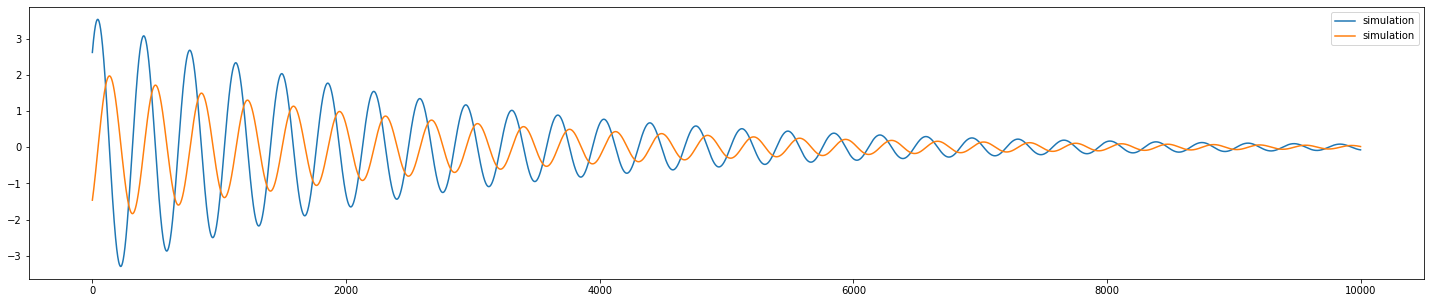

In [43]:
plt.figure(figsize=(25,5))
plt.plot(range(simulated_states.shape[0]),simulated_states,label='simulation')
plt.legend()
plt.show()